In [ ]:
from IPython.display import HTML, display
css_file_path = "../../design/custom.css"
styles = "<link rel='stylesheet' href='%s'>" % css_file_path
display(HTML(styles))

# 3.2 $\quad$ Optimización analítica

## Proposición 1: 

Dado una constante $c$ estimamos la diferencia de rentabilidad con respecto a la constante.

$$E(r)-c=
\left[\begin{array}{crl}
E(r_1)-c \\
E(r_2)-c \\
\vdots \\
E(r_n)-c
\end{array}\right]$$

donde:

- $E(r)$ es vector de los retornos esperados

- $\Sigma$ es la matriz de varianzas-covarianzas

Dado un vector $z$ que resuelve el siguiente sistema de ecuaciones $E(r)-c=\Sigma z$. La solución del sistema de ecuaciones nos permite estimar las ponderaciones $w$ que definen la cartera eficiente.

$$z=[z_1,z_2, \ldots, z_N]=\Sigma^{-1}[E(r)-c]$$

donde:

$$w=[w_1,w_2,\ldots, w_N] \Rightarrow w_i=\frac{z_i}{\sum_{j=1}^N z_j}$$





### Demostración Proposición 1:

Una cartera $w$ es eficiente si y sólo si está en la tangente de una recta que une un punto $c$ que está en el eje y con la frontera eficiente. 

La ecuación que define una recta que une una constante $c$ con el área de carteras factibles es:

$$\mu=c+\lambda\sigma$$

La pendiente de la recta es:

$$\begin{align}
\lambda &=\frac{\mu-c}{\sigma} \\
\lambda &=\frac{wE(R)-c}{\sqrt{w\Sigma w'}}=\frac{w[E(R)-c]}{\sqrt{w\Sigma w'}}
\end{align}$$

Si calculo el maximo de la pendiente obtendré una cartera eficiente:

$$\begin{gather}
max\text{  }\frac{w[E(R)-c]}{\sqrt{w\Sigma w'}}=\lambda(w) \\ 
s.t. \sum_i w_i=1 \nonumber
\end{gather}$$

Podemos abordar el problema introduciendo multiplicadores de Lagrange, pero también podemos aprovechar un truco.

El ratio de es una función homogénea de grado cero
$$\lambda(\alpha w)=\lambda(w), \forall \alpha >0$$

Eso implica que podemos resolver el problema de optimización sin necesidad de imponer la restricción $\sum_i w_i=1$. Por tanto, podemos maximizar la función $\lambda(x)$, siendo el vector $x$ las pseudoponderaciones que posteriormente normalizaremos.

$$w_i=\frac{x_i}{\sum_k x_k}$$

La identfiación de la cartera óptima la obtendremos aplicando la condición de primer orden a la siguiente función:

$$\lambda(x)=\frac{x(E(R)-c)}{(x^T\Sigma x)^{1/2}}$$

Lo que nos lleva a resolver el siguiente sistema de ecuaciones:
$$\frac{\partial \lambda}{\partial x_1}=0, \text{  } \frac{\partial \lambda}{\partial x_2}=0, \text{  }..., \frac{\partial \lambda}{\partial x_n}=0$$

La pendiente tiene la siguiente estructura:
$$\lambda=\frac{f(x)}{\sqrt{g(x)}}$$

Por tanto la condición de primer orden será:

$$\frac{\partial f}{\partial x_k}g^{-\frac{1}{2}}-\frac{1}{2}f(x)g^{-\frac{3}{2}}(x)\frac{\partial g}{\partial x_k}=0, k=1,...,n$$

Si asumimos que $g(x)\neq 0$, podemos simplificar la ecuación:

$$\frac{\partial f}{\partial x_k}=\frac{1}{2}\frac{ f(x)}{g(x)}\frac{\partial g}{\partial x_k}, k=1,...,n$$

Lo que se puede expresar como:

$$\bigtriangledown f(x)=\frac{1}{2}\frac{ f(x)}{g(x)}\bigtriangledown g(x)$$

Las características de las funciones $f(·)$ y $g(·)$ nos permiten resolver la ecuación:
- $g(·)$ es cuadrática y el gradiente de la matriz $x^T\Sigma x$ es $2\Sigma x$.
- El gradiente de la función lineal $f(x)=[E(r)-c]^Tx$ es el vector $[E(r)-c]$.
- El cociente $\frac{ f(x)}{g(x)}$ es sólo un número por ello no lo tendremos en cuenta. Consideramos que está incluido en el vector $x$ que posteriormente normalizaremos.

La condición de primer orden genera el siguiente sistema de ecuaciones:

$$\Sigma x=[E(r)-c] \rightarrow \boxed{x=\Sigma^{-1} [E(r)-c]} $$

Por último, recordad que hay que deshacer la transformación para recuperar el vector $w$:

$$\boxed{w_i = \frac{x_i}{\sum_{k} x_k}}$$

### Solución analítica en python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
#import cvxpy as cp
import yfinance as yf
import seaborn as sns
from scipy.interpolate import interp1d

plt.style.use('ggplot')

In [3]:
# Date range
start = '2015-01-01'
end = '2019-12-30'

# Assets todos con retornos positivos
assets = ['BA', 'BAX', 'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'F', 'GE', 'HPQ', 
        'JCI', 'JPM','KHC', 'LUV', 'MMC', 'MO', 'NI', 'PCAR', 'PSA', 'SEE', 
        'T', 'TGT', 'TMO','TXT', 'VZ', 'ZION']

# Downloading data
prices = yf.download(assets, start = start, end = end)['Adj Close']


c:\Users\nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]c:\Users\nacho\AppData\Local\Programs\Python\Pytho

In [4]:
# Calculamos los retornos
retornos = np.log(prices).diff().dropna()
num_act = len(assets)

# Calculamos la matriz de covarianzas y los retornos esperados
matriz_cov = retornos.cov().to_numpy()
retornos_esperados = retornos.mean().to_numpy()

#### Cálculo de $w$ dada una $k$

Usamos la siguiente fórmula que hemos calculado previamente:

$$x = \Sigma^{-1} \pi = \Sigma^{-1} (\mu - k)$$

In [5]:
k = 0.0001

x = np.linalg.inv(matriz_cov) @ (retornos_esperados - k)

Tenemos que normalizar $x$ para que los pesos sumen 1:

$$w_i = \frac{x_i}{\sum_{k} x_k}$$

In [7]:
w1 = x / x.sum()
w1.sum()

0.9999999999999996

Calculamos la rentabilidad y el riesgo de la cartera:

In [8]:
rent = (retornos @ w1).mean()
risk = (retornos @ w1).std()

Lo pintamos:

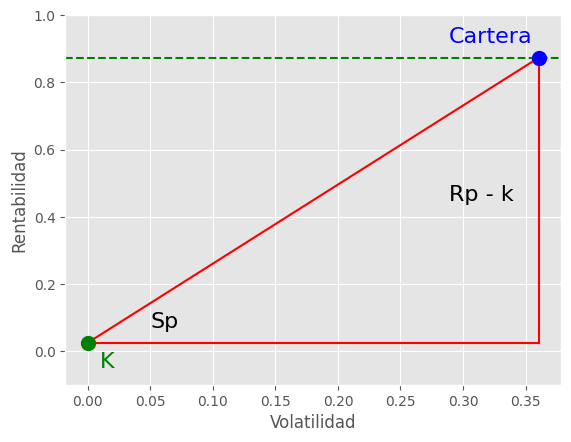

In [9]:
# Linea horizontal: volatilidad
plt.plot([0, risk*np.sqrt(252)], [k*252, k*252], color="red")

# Linea vertical: rentabilidad
plt.plot([risk*np.sqrt(252), risk*np.sqrt(252)], [k*252, rent*252], color="red")
plt.annotate("Rp - k", (risk*np.sqrt(252)*0.8, (rent*252 + k*252)/2), size=16)

# Linea diagonal
plt.plot([0,risk*np.sqrt(252)], [k*252,rent*252], color="red")

# Linea horizontal para rentabilidad de la cartera
plt.axhline(rent*252, linestyle='--', color="green")

# Cartera
plt.plot(risk*np.sqrt(252), rent*252, 'o', markersize=10, color="blue")
plt.annotate("Cartera", (risk*np.sqrt(252)*0.8, rent*252*1.05), size=16, color="blue")

# K
plt.plot(0, k*252, 'o', markersize=10, color="green")
plt.annotate("K", (0.01, k*252*(-2)), size=16, color="green")

# Sp
plt.annotate("Sp", (0.05, 0.07), size=16)

plt.xlabel("Volatilidad")
plt.ylabel("Rentabilidad")
plt.ylim(-0.1, 1.0)
plt.show()

### Generando carteras $w$ para diferentes valores de $k$

Vamos a definir distintos valores de $k$ en el rango [-0.1, 0.0001] y vamos a realizar la misma operación que arriba.

In [10]:
rents = []
risks = []
for k in np.linspace(-0.1, 0.0001, 1000):
    x = np.linalg.inv(matriz_cov) @ (retornos_esperados - k)
    w1 = x / x.sum()
    rent = (retornos @ w1).mean()
    risk = (retornos @ w1).std()
    rents.append(rent)
    risks.append(risk)

De esta manera, podemos obtener la frontera eficiente según diferentes valores de $k$.

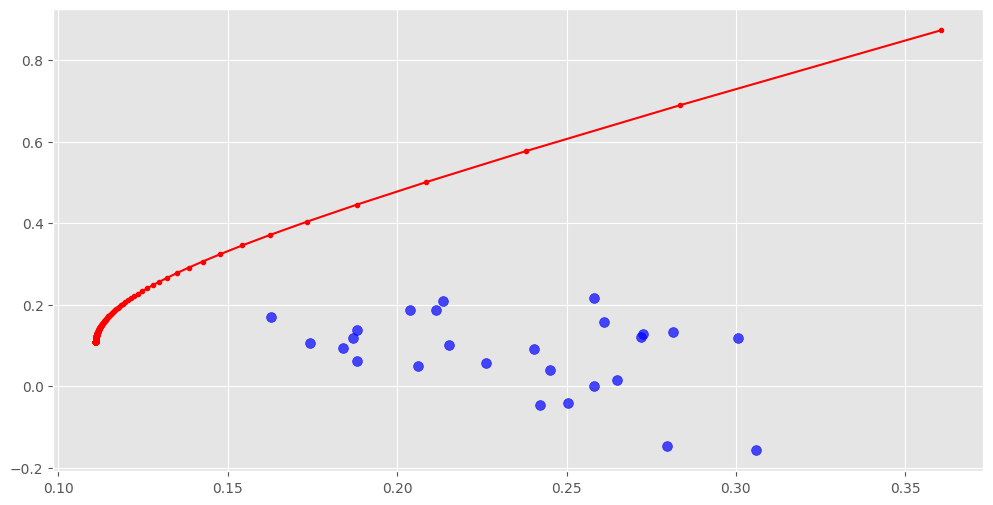

In [11]:
plt.figure(figsize=(12, 6))

# Puntos de cada activo
plt.scatter(np.sqrt(np.diag(matriz_cov)*252),252* retornos_esperados, color='blue', s=50, alpha=0.7)
plt.plot(np.array(risks) * np.sqrt(252), np.array(rents) * 252, '.-', color="red")
plt.show()

<BarContainer object of 26 artists>

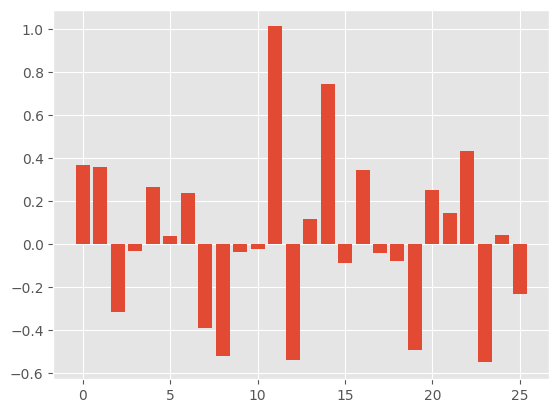

In [12]:
plt.bar(range(len(w1)), w1)

## Proposición 2: 

La combinación de dos carteras eficientes $w_x$ e $w_y$ genera una nueva cartera $w_z$ eficiente (Black 1972).
$$w_z=aw_x+(1-a)w_y=\left[\begin{array}{crl}
aw_{x_1}+(1-a)w_{y_1}  \\
aw_{x_2}+(1-a)w_{y_2} \\
\vdots \\
aw_{x_N}+(1-a)w_{y_N}
\end{array}\right]$$


### Demostración Proposición 1:

Si la cartera $x$ es eficiente significa que debe existir una constante $c_x$ tal que $E(R)-c_x=\Sigma x$. Del mismo modo, debe existir una $c_y$ tal que $E(R)-c_y=\Sigma y$.Por tanto:

Dado que $x$ e $y$ son los resultados obtenidos al  maximizar los ratios:
$$\lambda(x)=\frac{x(E(R)-c_x)}{\sigma(x)}$$
$$\lambda(y)=\frac{y(E(R)-c_y)}{\sigma(y)}$$

Recodamos que el ratio $\lambda$ de es una función homogénea de grado cero $\lambda(\alpha w)=\lambda(w), \forall \alpha >0$, por tanto si suponemos que $\sum_i x_i=1$ y que $\sum_i y_i=1$ no perdemos capacidad de generalización. Así

$$\begin{aligned}
z&=a{w_x}+(1-a){w_y}=ax+(1-a)y \\
z&=a\Sigma^{-1}(E(R)-c_x)+(1-a)\Sigma^{-1}(E(R)-c_y) \\
\Sigma z&=(a+1-a)E(R)-(ac_x+(1-a)c_y) \\
\Sigma z&=E(R)-c_z \\
\end{aligned}$$  



### Generando carteras eficientes mediante la combinación de dos carteras definidas por $k_1$ y $k_2$

In [13]:
k1 = 0.0
k2 = 0.0001

In [14]:
x = np.linalg.inv(matriz_cov) @ (retornos_esperados - k1)
w1 = x / x.sum()

cartera1_ret = retornos @ w1
rent1 = cartera1_ret.mean()
risk1 = cartera1_ret.std()
################################## Hasta aqui cartera 1

x = np.linalg.inv(matriz_cov) @ (retornos_esperados - k2)
w2 = x / x.sum()

cartera2_ret = retornos @ w2
rent2 = cartera2_ret.mean()
risk2 = cartera2_ret.std()
##################################### hasta aqui cartera 2
df = pd.DataFrame()
df['Cartera 1'] = cartera1_ret
df['Cartera 2'] = cartera2_ret
covarianza = df.cov().iloc[0, 1]

rents_2 = []
risks_2 = []
for w_1 in np.linspace(-1.2, 6.0, 200):
    w_2 = 1 - w_1
    rent = rent1 * w_1 + rent2 * w_2
    risk = np.sqrt(w_1**2 * risk1**2 + w_2**2 * risk2**2 + 2 * w_1 * w_2 * covarianza)
    rents_2.append(rent)
    risks_2.append(risk)

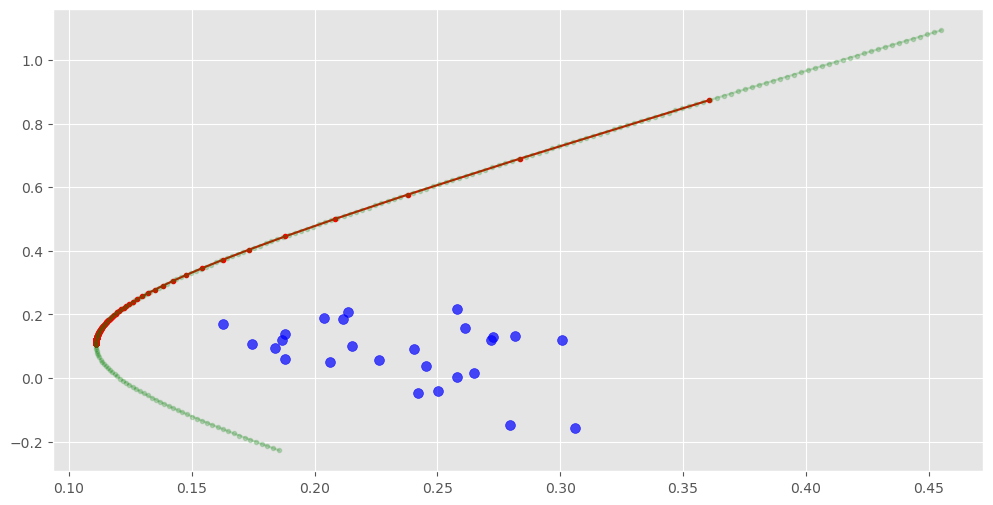

In [118]:
plt.figure(figsize=(12, 6))

# Puntos de cada activo
plt.scatter(np.sqrt(np.diag(matriz_cov)*252),252* retornos_esperados, color='blue', s=50, alpha=0.7)
plt.plot(np.array(risks) * np.sqrt(252), np.array(rents) * 252, '.-', color="red")
plt.plot(np.array(risks_2) * np.sqrt(252), np.array(rents_2) * 252, '.-', color="green", alpha=0.2)

plt.show()

## Restricciones adicionales

En la mayor parte de los casos, al problema anterior hay que añadirle alguna restricción adicional, por lo que hay que emplear otros métodos de optimización.

Por ejemplo, esta ecuación se puede replantear añadiendo una de las siguientes restricciones:

- Un objetivo de rentabilidad

$\qquad \underset{m}{\min} (w^T\Sigma w) \quad = \quad \underset{m}{\max} (-w^T\Sigma w)$

$\qquad s.t. \qquad w^T\mathbf I=1$

$\qquad s.t. \qquad w^T \mu = \hat{\mu}$

- Un objetivo de riesgo

$\qquad \underset{m}{\max} (w^T \mu)$

$\qquad s.t. \qquad w^T\mathbf I=1$

$\qquad s.t. \qquad w^T\Sigma w = \hat{\sigma}$

Utilizando Lagrange para resolver el problema:


$\qquad \mathcal{L}(w, \lambda_1, \lambda_2)=\left(-w^T\Sigma w\right)+\lambda_1\left( w^T\mu-\hat{\mu}\right)+\lambda_2\left( w^T\mathbf I-1 \right)$

La condición de primer orden del proceso de optimización será:

$$\frac{\partial \mathcal{L}}{\partial w}=-2\Sigma w+ \lambda_1 \mu + \lambda_2 \mathbf I = 0$$

$$\frac{\partial \mathcal{L}}{\partial \lambda_1} = w^T\mu-\hat{\mu} = 0$$

$$\frac{\partial \mathcal{L}}{\partial \lambda_2} = w^T\mathbf I-1 = 0$$

En realidad, calculamos las carteras eficientes mediante **problemas de optimización** y vamos a resolverlos numéricamente. Vamos a estudiar una introducción a la optimización y a las librerías que existen en Python para resolver este tipo de problemas. Una vez aprendidos los mecanismos de resolución de problemas de optimización que hay en Python, volveremos a calcular más ejemplos de carteras eficientes.

# NOTAS ADICIONALES

### Cartera de mínima varianza

La cartera de mínima varianza se obtiene solucionando el siguiente problema de optimización:
$$\begin{gather}
\underset{w}{min} \left(w^T\Sigma w\right) \\
s.t. w^T\mathbf I=1 \nonumber
\end{gather}$$

Estimamos el Lagranjiano y aplicamos la condición de primer orden

$$\begin{align}
\mathcal{L}(w,\lambda)&=\left(w^T\Sigma w\right)-\lambda\left( w^T\mathbf I=1\right) \\
\frac{\partial L}{\partial w}&=2\Sigma w- \lambda \mathbf I=0 \\
\frac{\partial L}{\partial \lambda} &=w^T\mathbf I-1=0
\end{align} $$

El sistema de ecuaciones nos lleva a la siguiente solución:
$$w=\frac{\Sigma^{-1}\mathbf I}{\mathbf I^T\Sigma^{-1}\mathbf I}$$